In [95]:
# Import libries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
from scipy import stats
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

In [96]:
# Import dataframes AND Specify a custom delimiter for the CSV input (sep=' ')

ecu_dbs_gross=pd.read_csv(r'C:\Users\jspad\Documents\Code Academy\Data Bases\OBD2_Doblone.csv', sep=',')


In [97]:
ecu_dbs_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   dteday                                      14024 non-null  object 
 1   hr                                          14024 non-null  object 
 2    Longitude                                  14024 non-null  float64
 3    Latitude                                   14024 non-null  float64
 4   GPS Speed (Meters/second)                   14024 non-null  float64
 5    Horizontal Dilution of Precision           14024 non-null  float64
 6    Altitude                                   14024 non-null  float64
 7    Bearing                                    14024 non-null  float64
 8    G(x)                                       14024 non-null  float64
 9    G(y)                                       14024 non-null  float64
 10   G(z)     

In [89]:
ecu_dbs_gross

,dteday,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),...,Acceleration Sensor(Z axis)(g),Acceleration Sensor(Total)(g),Ambient air temp(°C),Catalyst Temperature (Bank 1 Sensor 1)(°C),Intake Air Temperature(°C),Engine Coolant Temperature(°C),Voltage (OBD Adapter)(V),Voltage (Control Module)(V),Speed (GPS)(km/h),Speed (OBD)(km/h)
0,07-04-2022 17:35:27.238,11.317095,46.471400,0.0,32.160,473.837708,0.0,-1.033699,5.883353,8.158628,...,0.77,0.05,19,464.600006,29,68,13.8,14.12,0.0,0
1,07-04-2022 17:35:27.335,11.317095,46.471400,0.0,32.160,473.837708,0.0,0.160917,5.568098,6.770492,...,0.59,-0.10,19,464.600006,29,68,13.8,14.12,0.0,0
2,07-04-2022 17:35:27.435,11.317095,46.471400,0.0,32.160,473.837708,0.0,-0.751047,5.140082,8.118847,...,0.72,0.00,19,464.600006,29,68,13.8,14.12,0.0,0
3,07-04-2022 17:35:27.534,11.317095,46.471400,0.0,32.160,473.837708,0.0,-2.012364,5.713462,9.115458,...,0.80,0.08,19,464.600006,29,68,13.8,14.20,0.0,0
4,07-04-2022 17:35:27.635,11.317095,46.471400,0.0,32.160,473.837708,0.0,-1.330409,5.854041,8.236993,...,0.82,0.11,19,464.600006,29,68,13.8,14.20,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,07-04-2022 17:58:49.137,11.235085,46.379314,0.0,4.288,640.086182,0.0,-0.960120,6.710671,7.175178,...,0.62,0.00,17,682.700012,33,85,13.9,14.28,0.0,0
14020,07-04-2022 17:58:49.235,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.920639,6.753742,6.976274,...,0.62,0.00,17,682.700012,33,85,13.9,14.28,0.0,0
14021,07-04-2022 17:58:49.337,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.956531,6.713064,7.134500,...,0.60,-0.01,17,682.700012,33,85,13.9,14.28,0.0,0
14022,07-04-2022 17:58:49.437,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.894317,6.689136,7.193124,...,0.63,0.00,17,682.700012,33,85,13.9,14.28,0.0,0


In [98]:
#Convert time and date into timestamp objects 
t= ecu_dbs_gross['hr']
ecu_dbs_gross['hr'] = pd.to_datetime(t, unit='ns').dt.time

d = ecu_dbs_gross['dteday']
ecu_dbs_gross['dteday'] = pd.to_datetime(d).dt.date


#Combine time and date into one column
ecu_dbs_gross['dteday'] = ecu_dbs_gross.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)


<ipython-input-98-75b34f1350d3>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ecu_dbs_gross['dteday'] = ecu_dbs_gross.apply(lambda r : pd.datetime.combine(r['dteday'],r['hr']),1)


In [99]:
ecu_dbs_gross

,dteday,hr,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),...,Acceleration Sensor(Z axis)(g),Acceleration Sensor(Total)(g),Ambient air temp(°C),Catalyst Temperature (Bank 1 Sensor 1)(°C),Intake Air Temperature(°C),Engine Coolant Temperature(°C),Voltage (OBD Adapter)(V),Voltage (Control Module)(V),Speed (GPS)(km/h),Speed (OBD)(km/h)
0,2022-07-04 17:35:27.238,17:35:27.238000,11.317095,46.471400,0.0,32.160,473.837708,0.0,-1.033699,5.883353,...,0.77,0.05,19,464.600006,29,68,13.8,14.12,0.0,0
1,2022-07-04 17:35:27.335,17:35:27.335000,11.317095,46.471400,0.0,32.160,473.837708,0.0,0.160917,5.568098,...,0.59,-0.10,19,464.600006,29,68,13.8,14.12,0.0,0
2,2022-07-04 17:35:27.435,17:35:27.435000,11.317095,46.471400,0.0,32.160,473.837708,0.0,-0.751047,5.140082,...,0.72,0.00,19,464.600006,29,68,13.8,14.12,0.0,0
3,2022-07-04 17:35:27.534,17:35:27.534000,11.317095,46.471400,0.0,32.160,473.837708,0.0,-2.012364,5.713462,...,0.80,0.08,19,464.600006,29,68,13.8,14.20,0.0,0
4,2022-07-04 17:35:27.635,17:35:27.635000,11.317095,46.471400,0.0,32.160,473.837708,0.0,-1.330409,5.854041,...,0.82,0.11,19,464.600006,29,68,13.8,14.20,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,2022-07-04 17:58:49.137,17:58:49.137000,11.235085,46.379314,0.0,4.288,640.086182,0.0,-0.960120,6.710671,...,0.62,0.00,17,682.700012,33,85,13.9,14.28,0.0,0
14020,2022-07-04 17:58:49.235,17:58:49.235000,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.920639,6.753742,...,0.62,0.00,17,682.700012,33,85,13.9,14.28,0.0,0
14021,2022-07-04 17:58:49.337,17:58:49.337000,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.956531,6.713064,...,0.60,-0.01,17,682.700012,33,85,13.9,14.28,0.0,0
14022,2022-07-04 17:58:49.437,17:58:49.437000,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.894317,6.689136,...,0.63,0.00,17,682.700012,33,85,13.9,14.28,0.0,0


In [100]:
#Drop Columns 1
ecu_dbs=ecu_dbs_gross.drop(['hr'], axis=1)


In [101]:
ecu_dbs=ecu_dbs.dropna(axis=1, how='all')

In [102]:
ecu_dbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14024 entries, 0 to 14023
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   dteday                                      14024 non-null  datetime64[ns]
 1    Longitude                                  14024 non-null  float64       
 2    Latitude                                   14024 non-null  float64       
 3   GPS Speed (Meters/second)                   14024 non-null  float64       
 4    Horizontal Dilution of Precision           14024 non-null  float64       
 5    Altitude                                   14024 non-null  float64       
 6    Bearing                                    14024 non-null  float64       
 7    G(x)                                       14024 non-null  float64       
 8    G(y)                                       14024 non-null  float64       
 9    G(z) 

In [11]:
ecu_dbs

,dteday,Latitude,GPS.1,Speed,(Meters/second),Unnamed: 12,Horizontal,Dilution,of,Precision,...,Per,Litre(Instant)(kpl),Fuel,Trim,Bank,1,Long,Term(%),Fuel.1,Trim.1
0,2022-04-07 17:35:27.238,11.317095,46.471400,0.0,32.160,473.837708,0.0,-1.033699,5.883353,8.158628,...,0.77,0.05,19,464.600006,29,68,13.8,14.12,0.0,0
1,2022-04-07 17:35:27.335,11.317095,46.471400,0.0,32.160,473.837708,0.0,0.160917,5.568098,6.770492,...,0.59,-0.10,19,464.600006,29,68,13.8,14.12,0.0,0
2,2022-04-07 17:35:27.435,11.317095,46.471400,0.0,32.160,473.837708,0.0,-0.751047,5.140082,8.118847,...,0.72,0.00,19,464.600006,29,68,13.8,14.12,0.0,0
3,2022-04-07 17:35:27.534,11.317095,46.471400,0.0,32.160,473.837708,0.0,-2.012364,5.713462,9.115458,...,0.80,0.08,19,464.600006,29,68,13.8,14.20,0.0,0
4,2022-04-07 17:35:27.635,11.317095,46.471400,0.0,32.160,473.837708,0.0,-1.330409,5.854041,8.236993,...,0.82,0.11,19,464.600006,29,68,13.8,14.20,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14019,2022-04-07 17:58:49.137,11.235085,46.379314,0.0,4.288,640.086182,0.0,-0.960120,6.710671,7.175178,...,0.62,0.00,17,682.700012,33,85,13.9,14.28,0.0,0
14020,2022-04-07 17:58:49.235,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.920639,6.753742,6.976274,...,0.62,0.00,17,682.700012,33,85,13.9,14.28,0.0,0
14021,2022-04-07 17:58:49.337,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.956531,6.713064,7.134500,...,0.60,-0.01,17,682.700012,33,85,13.9,14.28,0.0,0
14022,2022-04-07 17:58:49.437,11.235085,46.379314,0.0,4.288,639.991943,0.0,-0.894317,6.689136,7.193124,...,0.63,0.00,17,682.700012,33,85,13.9,14.28,0.0,0


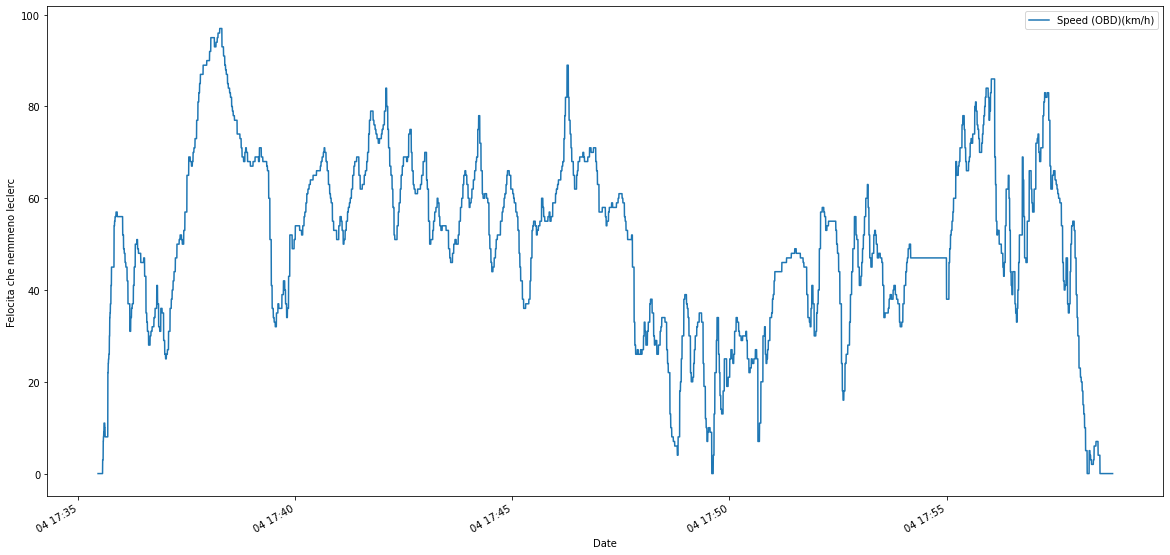

In [103]:
# Speed

ecu_dbs_speed= ecu_dbs.groupby(ecu_dbs['dteday'])['Speed (OBD)(km/h)'].sum().reset_index()
ecu_dbs_speed = ecu_dbs_speed.set_index('dteday')
ecu_dbs_speed.index = pd.to_datetime(ecu_dbs_speed.index)

ecu_dbs_speed.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Felocita che nemmeno leclerc');

In [ ]:
# Throttle cosi' impari

ecu_dbs_thr= ecu_dbs.groupby(ecu_dbs['dteday'])['Speed (OBD)(km/h)'].sum().reset_index()
ecu_dbs_thr = ecu_dbs_thr.set_index('dteday')
ecu_dbs_thr.index = pd.to_datetime(ecu_dbs_speed.index)

ecu_dbs_speed.plot(figsize=(20, 10))
plt.xlabel('Date')
plt.ylabel('Felocita che nemmeno leclerc');

In [4]:
#Merging datasets

# part_df=pd.merge(products, stock, on="index_col")
# part_df=part_df.drop(['ASIN_y'], axis=1)

# part2_df=pd.merge(part_df, assessment, on="index_col")
# part2_df=part2_df.drop(['ASIN_x'], axis=1)

# part3_df=pd.merge(part2_df, invoices, on="index_col")
# part3_df=part3_df.drop(['ASIN_y'], axis=1)

# full_df=pd.merge(part3_df, customers, on="index_col")
# full_df=full_df.drop(['CustomerID_y', 'index_col'], axis=1)


In [17]:
# Dropping columns

# df=df.drop(['invoice_time', 'StockCode'], axis=1)

# # Data cleaning - checking missing values (Customerid missing) 
# #np.issubdtype(df['CustomerID_x'].dtype, np.number)

# df=df[pd.to_numeric(df['CustomerID_x'], errors='coerce').notnull()]

# # Data cleaning - checking missing values (Customerid missing) 

# df_country=df[pd.to_numeric(df['CustomerID_x'], errors='coerce').notnull()]

# # Rename
# df=df.rename(columns={"title": "Description",
#                                 "ASIN_x": "ASIN",
#                                 "CustomerID_x": "CustomerID"})

# # Transforming these labels into categrical data type

# df['product_type'] = pd.Categorical(df['product_type'],
# categories=['dslr camera', 'keyboard', 'monitor', 'mouse', 'processor', 'smartphone',])


# df['Country'] = pd.Categorical(df['Country'],
# categories=['Australia','Austria','Bahrain','Belgium','Brazil','Canada','Cyprus','Czech Republic','Denmark','European Community','Finland','France','Germany','Greece',
#             'Iceland','Ireland','Israel','Italy','Japan','Lebanon','Lithuania','Malta','Netherlands','Norway','Poland','Portugal','Saudi Arabia','Singapore',
#             'South Africa','Spain','Sweden','Switzerland','United Arab Emirates','United Kingdom','United States','Unknown'])

In [ ]:
# Pivot tabel per Customer

# table_customer = pd.pivot_table(df, values='total_sale', index=['CustomerID', 'Country', 'product_type'],
#                     aggfunc=np.sum,
#                     observed=True)

# table_customer=table_customer.sort_values(by=['total_sale'], ascending=False)

# table_customer

In [ ]:
# t_sales=df.groupby('CustomerID')['total_sale'].agg(['sum','count','mean']).sort_values(by=['sum'], ascending=False)

# t_sales.describe()

In [ ]:
# Pivot tabel per Category of Product

# table_product = pd.pivot_table(df_country, values='total_sale', index=[ 'product_type'],
#                     aggfunc=np.sum,
#                     observed=True)

# table_product=table_product.sort_values(by=['total_sale'], ascending=False)

# table_product.sort_values(by=['total_sale'], ascending=False).round()

In [ ]:
# # Which countries and which customers made the highest number of orders? Are they the same with the highest spending?


# country_sales=df_country.groupby('Country')['total_sale'].agg(['sum','count','mean']).sort_values(by=['count'], ascending=False)

# country_sales


In [ ]:
# # IRQ

# # Select the first quantile
# q1 =df['total_sale'].quantile(.25)

# # Select the third quantile
# q3 = df['total_sale'].quantile(.75)

# # Create a mask inbeetween q1 & q3
# mask = df['total_sale'].between(q1, q3, inclusive=True)

# # Filtering the initial dataframe with a mask
# iqr = df.loc[mask, 'total_sale']

In [37]:
# Create a filtered DF

# df2=df.drop(['Description',	'product_type', 'rating', 'review_count', 'ASIN', 'InvoiceNo', 'Quantity','price', 'CustomerID', 'Country'], axis=1)
# df_filtered = df2[df2['total_sale'] <= 648]
# df_filtered2 = df_filtered[df_filtered['total_sale'] >= 60]
# df_filtered2.info

<bound method DataFrame.info of         total_sale        invoice_date
1           159.96 2018-12-01 17:00:00
3           199.99 2018-12-01 17:00:00
5           335.86 2018-12-01 17:00:00
6            71.70 2018-12-01 17:00:00
7           395.00 2018-12-01 17:00:00
...            ...                 ...
554411      543.68 2019-12-09 08:00:00
554412      179.88 2019-12-09 08:00:00
554413      179.94 2019-12-09 08:00:00
554414       83.64 2019-12-09 08:00:00
554415      279.80 2019-12-09 08:00:00

[206005 rows x 2 columns]>

In [94]:
#%reset